# Milestones 2

---

## Introduction

> Perkenalkan nama saya Pascalis Farrel, student Hacktiv8 FTDS Batch 008.

### Dataset

Dataset ini adalah catatan dari 7 spesies ikan umum yang berbeda dalam penjualan pasar ikan. Dengan dataset ini, model prediksi dapat dilakukan dengan menggunakan data yang ramah mesin dan perkiraan berat ikan dapat diprediksi. Dataset dapat dilihat di [kaggle](https://www.kaggle.com/aungpyaeap/fish-market).

Keterangan dari kolom dataset ini adalah:

| Feature        | Description                                                                                                                                                                                                                                                                                                                                                                                                        |
| -------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| Species            | Nama spesies ikan                                                                                                                                                                                                                                                                                                                                                                                                       |
| Weight            | Berat ikan dalam gram                                                                                                                                                                                                                            |
| Length1        | Panjang vertikal dalam cm                                                                                                                                                                                                                                                                                               |
| Length2      | Panjang diagonal dalam cm                                                                                                                                                                                                                                                                              |
| Length3        | Panjang silang dalam cm                                                                                                                                                                                                                                                                                                                                                       |
| Height        | Tinggi dalam cm                                                                                                                                                                                                                                                                                                                                                            |
| Width              | Lebar diagonal dalam cm                                                                                                                                                                                                                                                                                                                                                    |

### Objectives

Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 1:

- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

## Import Libraries

Pada milestone 2 ini akan menggunakan library **warnings**, **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, dan **Scikit-Learn**.

In [59]:
import warnings
warnings.filterwarnings('ignore')
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

Melakukan setting agar pandas menampilkan seluruh kolom pada dataframe.

In [60]:
pd.set_option('display.max_columns', None)

## Data Loading

Membuat dataframe bernama `df` dari file `Fish.csv`.

In [61]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


### Data Characteristics

In [62]:
df.shape

(159, 7)

Dataset ini memiliki **159 baris** dengan **7 kolom**.

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Dari basic info ini dapat diketahui datafrane terbentuk dari:
- 6 kolom dengan tipe **float**
- 1 kolom dengan tipe **object**

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


Distribusi dari kolom pada dataset kebanyakan memiliki distribusi yang cenderung normal (**Symmetrical Distribution**) contohnya pada kolom `Height` dimana mean dari kolom tersebut berdekatan dengan mediannya.

## Data Cleaning

### Missing Values

Akan dilakukan pengecekan terhadap missing value.

In [65]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Diketahui tidak terdapat missing value pada dataset ini.

### Duplicated Data

pada bagian ini akan dilakukan pengecekan terhadap data duplikat.

In [66]:
df.duplicated().sum()

0

Tidak terdapat duplicated rows pada dataset ini.

## Exploratory Data Analysis

### Weight (Target Label)

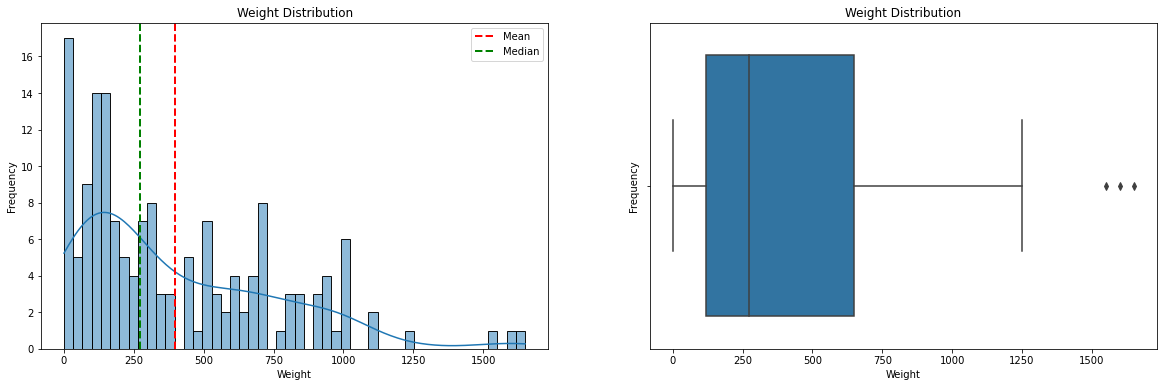

Skewness: 1.1044503929261893
Mean: 398.3264150943396
Median: 273.0


In [67]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.histplot(x='Weight', data=df, bins=50, kde=True)
plt.axvline(df.Weight.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df.Weight.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='Weight', data=df)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {df.Weight.skew()}')
print(f'Mean: {df.Weight.mean()}')
print(f'Median: {df.Weight.median()}')

Kolom `Weight` ini memiliki distribusi yang **skew** karena nilai dari skewnessnya lebih dari 1 dengan mean dan mediannya yang berjauhan, pada kolom `Weight` ini juga ditemukan **adanya outlier**.

### Species

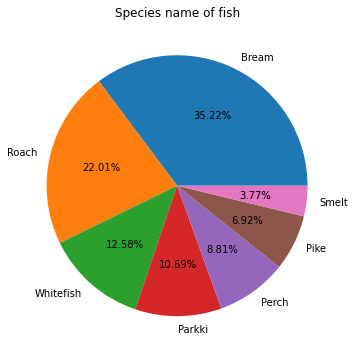

In [68]:
plt.figure(figsize=(20,6))
plt.pie(df['Species'].value_counts(), labels=df['Species'].unique(), autopct='%.2f%%')
plt.title('Species name of fish')
plt.show()

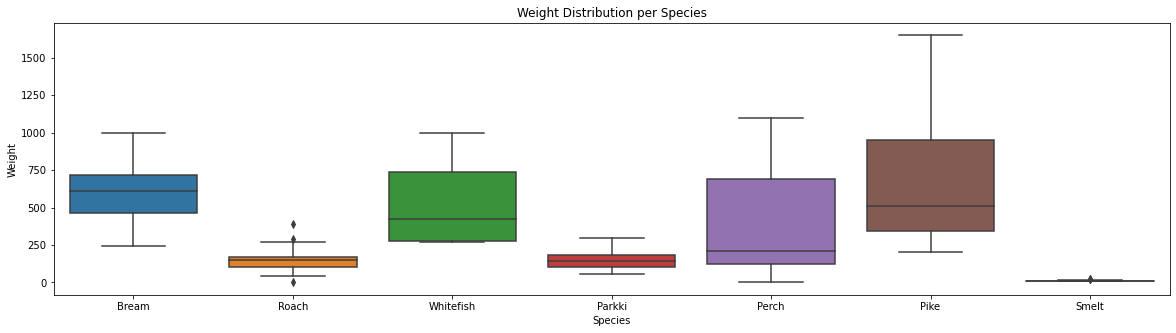

In [69]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Species', y='Weight', data=df)
plt.title('Weight Distribution per Species')
plt.xlabel('Species')
plt.ylabel('Weight')
plt.show()

Diketahui mayoritas spesies ikan yang ada pada dataset ini adalah ikan Bream, dan spesies tersebut merupakan spesies terberat diantara spesies lainnya dengan smelt menduduki spesies teringan.

### Length

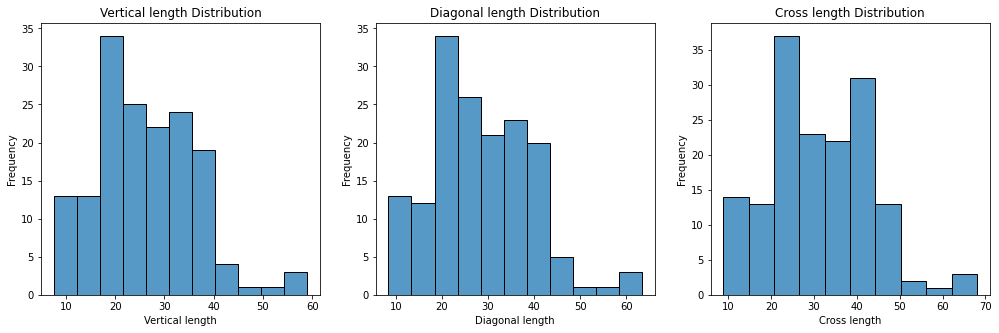

In [70]:
plt.figure(figsize=(17,5))
plt.subplot(1, 3, 1)
sns.histplot(x='Length1', data=df)
plt.title('Vertical length Distribution')
plt.xlabel('Vertical length')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
sns.histplot(x='Length2', data=df)
plt.title('Diagonal length Distribution')
plt.xlabel('Diagonal length')
plt.ylabel('Frequency')
plt.subplot(1, 3, 3)
sns.histplot(x='Length3', data=df)
plt.title('Cross length Distribution')
plt.xlabel('Cross length')
plt.ylabel('Frequency')
plt.show()

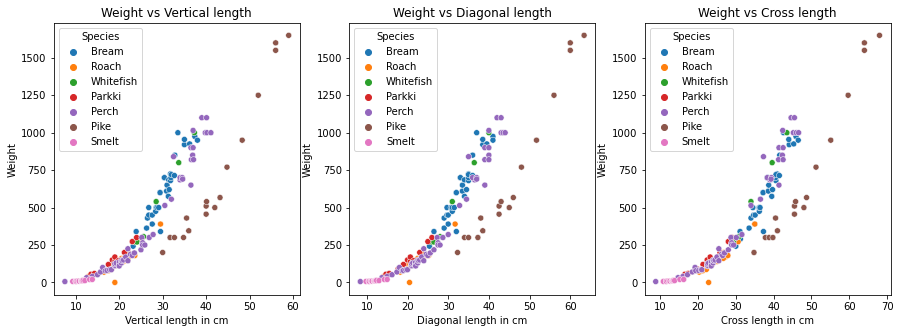

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Length1', y='Weight', data=df, hue='Species')
plt.title('Weight vs Vertical length')
plt.xlabel('Vertical length in cm')
plt.ylabel('Weight')
plt.subplot(1, 3, 2)
sns.scatterplot(x='Length2', y='Weight', data=df, hue='Species')
plt.title('Weight vs Diagonal length')
plt.xlabel('Diagonal length in cm')
plt.ylabel('Weight')
plt.subplot(1, 3, 3)
sns.scatterplot(x='Length3', y='Weight', data=df, hue='Species')
plt.title('Weight vs Cross length')
plt.xlabel('Cross length in cm')
plt.ylabel('Weight')
plt.show()

Diketahui ikan pike memiliki overall lenght terbesar dan ikan smelt memiliki overall length terkecil diantara ikan lainnya.

## Height

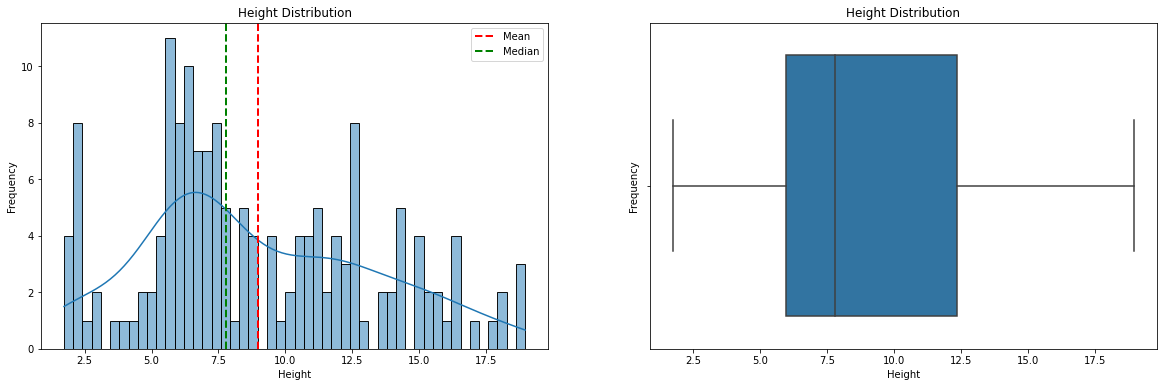

Skewness: 0.39718636256683026
Mean: 8.970993710691822
Median: 7.786


In [72]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.histplot(x='Height', data=df, bins=50, kde=True)
plt.axvline(df.Height.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df.Height.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='Height', data=df)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {df.Height.skew()}')
print(f'Mean: {df.Height.mean()}')
print(f'Median: {df.Height.median()}')

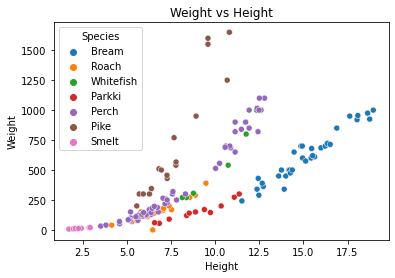

In [73]:
sns.scatterplot(x='Height', y='Weight', data=df, hue='Species')
plt.title('Weight vs Height')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Diketahui mayoritas ikan bream memiliki nilai tinggi terbesar dibandingkan dengan spesies lainnya, melainkan ikan smelt memiliki tinggi terkecil dibandingkan dengan spesies lainnya.

## Width

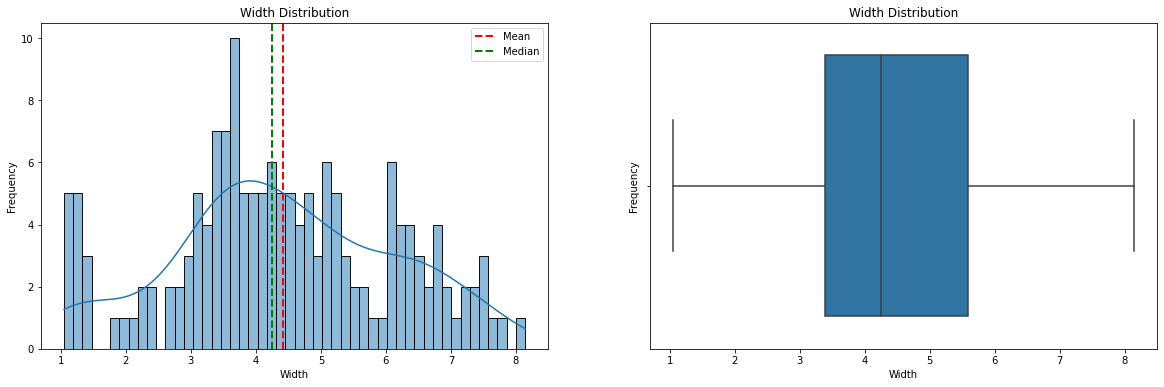

Skewness: 0.00497224623809981
Mean: 4.417485534591194
Median: 4.2485


In [74]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.histplot(x='Width', data=df, bins=50, kde=True)
plt.axvline(df.Width.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df.Width.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='Width', data=df)
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {df.Width.skew()}')
print(f'Mean: {df.Width.mean()}')
print(f'Median: {df.Width.median()}')

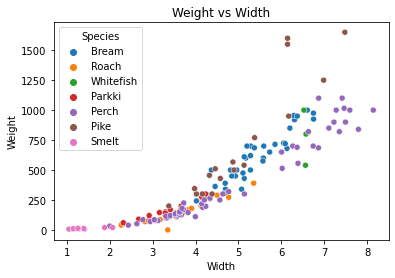

In [75]:
sns.scatterplot(x='Width', y='Weight', data=df, hue='Species')
plt.title('Weight vs Width')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.show()

Diketahui ikan perch memiliki nilai lebar terbesar dibandingkan dengan spesies lainnya, melainkan ikan smelt memiliki lebar terkecil dibandingkan dengan spesies lainnya.

### Correlation Between Numeric Columns

Text(0.5, 1.0, 'Correlation Matrix')

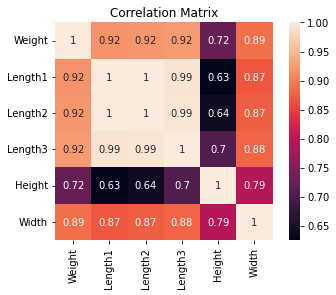

In [76]:
sns.heatmap(df.corr(), square=True, annot=True)
plt.title('Correlation Matrix')

Diketahui weight memiliki korelasi yang tinggi dengan kolom-kolom lainnya. Maka, semua kolom numerik akan dijadikan feature.

### Correlation Between Species & Weight

In [77]:
cat_corr = pd.get_dummies(df[['Species', 'Weight']]).corr()
cat_corr.style.background_gradient(cmap='coolwarm')

,Weight,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
Weight,1.000000,0.326795,-0.186034,-0.033240,0.310641,-0.261784,-0.337109,0.073625
Species_Bream,0.326795,1.000000,-0.144840,-0.391741,-0.183825,-0.201526,-0.165083,-0.105209
Species_Parkki,-0.186034,-0.144840,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988
Species_Perch,-0.033240,-0.391741,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018
Species_Pike,0.310641,-0.183825,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519
Species_Roach,-0.261784,-0.201526,-0.103413,-0.279694,-0.131247,1.000000,-0.117866,-0.075117
Species_Smelt,-0.337109,-0.165083,-0.084712,-0.229116,-0.107513,-0.117866,1.000000,-0.061533
Species_Whitefish,0.073625,-0.105209,-0.053988,-0.146018,-0.068519,-0.075117,-0.061533,1.000000


Diketahui jenis ikan bream, parkki, pike, roach, dan smelt memiliki korelasi yang besar dengan kolom weight. Melainkan jenis ikan perch dan whitefish tidak berkorelasi dengan kolom weight.

## Data Preprocessing

### Data Inference
Pada bagian data inference ini akan mengambil sample sebanyak **10 data** dari dataframe utama.

In [78]:
# Get Data Inference
df_inf = df.sample(20, random_state=15)

# Remove Data Inference from main dataframe
df = df.drop(df_inf.index)

df_inf

,Species,Weight,Length1,Length2,Length3,Height,Width
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
63,Parkki,90.0,16.3,17.7,19.8,7.4052,2.6730
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
31,Bream,955.0,35.0,38.5,44.0,18.0840,6.2920
117,Perch,650.0,36.5,39.0,41.4,11.1366,6.0030
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
130,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
111,Perch,840.0,32.5,35.0,37.3,11.4884,7.7957
25,Bream,725.0,31.8,35.0,40.9,16.3600,6.0532


### Split Data

Membuat training set dan test set dengan perbandingan **8:2**, dimana:
- **80%** data menjadi **training set**
- **20%** data menjadi **test set**

In [79]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=23)
df_train.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
101,Perch,218.0,25.0,26.5,28.0,7.1680,4.1440
122,Perch,820.0,37.1,40.0,42.5,11.1350,6.6300
123,Perch,1100.0,39.0,42.0,44.6,12.8002,6.8684
87,Perch,120.0,20.0,22.0,23.5,5.6400,3.5250
28,Bream,850.0,32.8,36.0,41.6,16.8896,6.1984


In [80]:
df_test.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
115,Perch,690.0,34.6,37.0,39.3,10.5717,6.3666
79,Perch,80.0,17.2,19.0,20.2,5.6358,3.0502
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600


In [81]:
print(f'df_train proportion: {len(df_train) / len(df):.1f}')
print(f'df_test proportion: {len(df_test) / len(df):.1f}')

df_train proportion: 0.8
df_test proportion: 0.2


In [82]:
preprocess_handling = pd.DataFrame({'columns':df_train.describe().columns, 'skew' : df.skew(axis=0)})
preprocess_handling.reset_index(drop=True, inplace=True)

preprocess_handling['status'] = np.where(preprocess_handling['skew'].abs()>0.5, 'Skewed', 'Normal')
preprocess_handling

,columns,skew,status
0,Weight,1.076700,Skewed
1,Length1,0.530267,Skewed
2,Length2,0.482240,Normal
3,Length3,0.344974,Normal
4,Height,0.402214,Normal
5,Width,-0.007549,Normal


### Handling Outlier
> Pada bagian ini akan dilakukan outlier handling untuk kolom `Length1` dan `Length2` pada `df_train`.

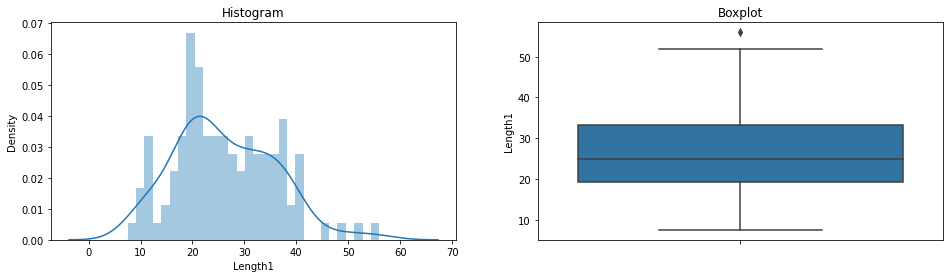

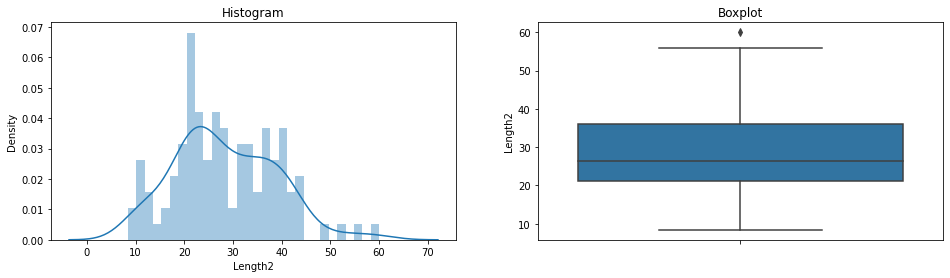

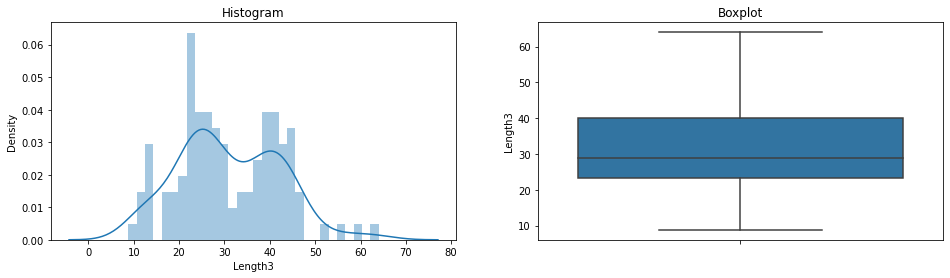

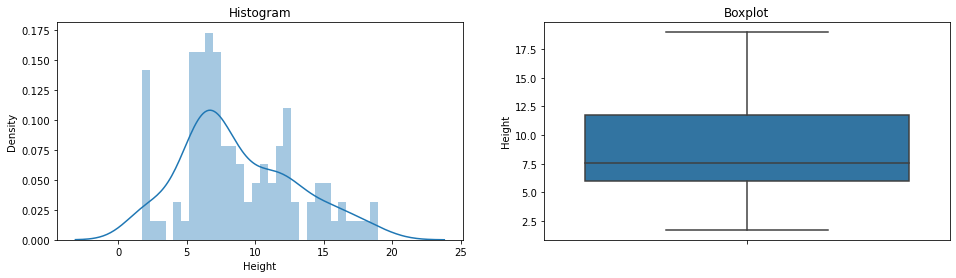

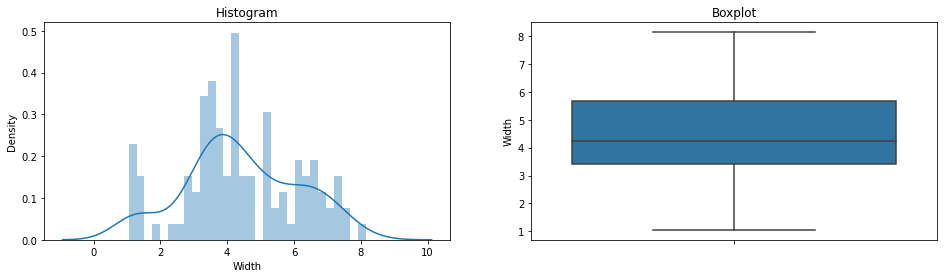

In [83]:
def diagnostic_plots(df_train, variables):
    # Define Figure Size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df_train[variables], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_train[variables])
    plt.title('Boxplot')

    plt.show

# Cek Outlier pada kolom 

diagnostic_plots(df_train, 'Length1')
diagnostic_plots(df_train, 'Length2')
diagnostic_plots(df_train, 'Length3')
diagnostic_plots(df_train, 'Height')
diagnostic_plots(df_train, 'Width')

In [84]:
def find_skewed_boundaries(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - (IQR * 1.5)
    upper_bound = df[col].quantile(0.75) + (IQR * 1.5)

    return lower_bound, upper_bound

print(find_skewed_boundaries(df_train, 'Length1'))
print(find_skewed_boundaries(df_train, 'Length2'))


(-1.3499999999999943, 53.849999999999994)
(-1.1250000000000036, 58.275000000000006)


In [85]:
a_lower_boundary, a_upper_boundary = find_skewed_boundaries(df_train, 'Length1')
b_lower_boundary, b_upper_boundary = find_skewed_boundaries(df_train, 'Length2')
print(f'Number of outliers (Length1): {len(df_train[(df_train.Length1 < a_lower_boundary) | (df_train.Length1 > a_upper_boundary)])}')
print(f'Number of outliers (Length2): {len(df_train[(df_train.Length2 < b_lower_boundary) | (df_train.Length2 > b_upper_boundary)])}')

Number of outliers (Length1): 1
Number of outliers (Length2): 1


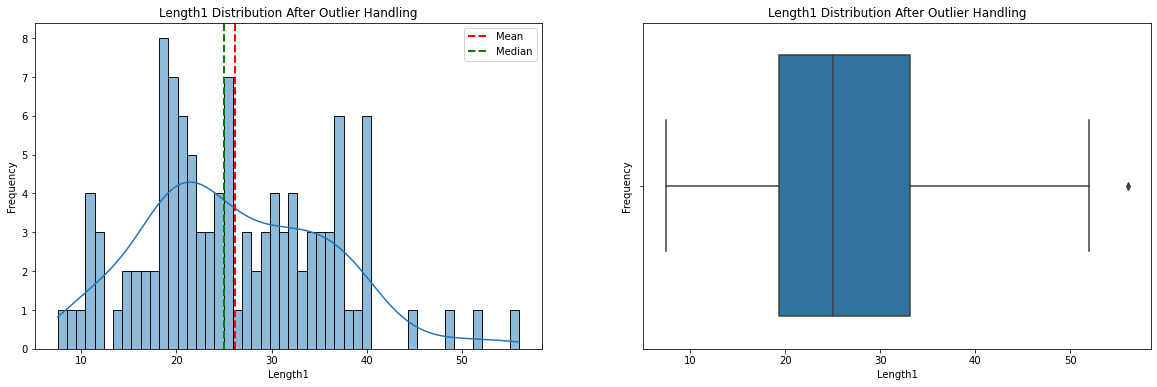

In [86]:
df_train = df_train[(df_train.Height > a_lower_boundary) & (df_train.Height < a_upper_boundary)]

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='Length1', data=df_train, bins=50, kde=True)
plt.axvline(df_train.Length1.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_train.Length1.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Length1 Distribution After Outlier Handling')
plt.xlabel('Length1')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='Length1', data=df_train)
plt.title('Length1 Distribution After Outlier Handling')
plt.xlabel('Length1')
plt.ylabel('Frequency')

plt.show()

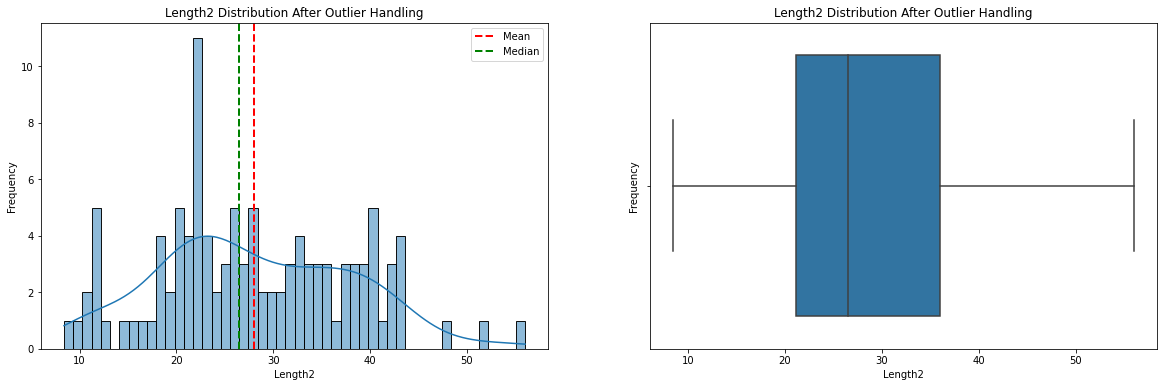

In [87]:
df_train = df_train[(df_train.Length2 > b_lower_boundary) & (df_train.Length2 < b_upper_boundary)]

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='Length2', data=df_train, bins=50, kde=True)
plt.axvline(df_train.Length2.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df_train.Length2.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Length2 Distribution After Outlier Handling')
plt.xlabel('Length2')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 2, 2)
sns.boxplot(x='Length2', data=df_train)
plt.title('Length2 Distribution After Outlier Handling')
plt.xlabel('Length2')
plt.ylabel('Frequency')

plt.show()

### Handling Missing Values

In [88]:
df_train.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [89]:
df_test.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [90]:
df_inf.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Tidak terdapat mising value pada 'df_train', 'df_test', dan 'df_inf'.

### Feature Engineering

#### Feature Selection

Berdasarkan hasil **EDA**, semua kolom akan dijadikan **features** selain kolom `Weight` yang akan menjadi **label**.

In [91]:
X_train = df_train[['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width']] # Features
y_train = df_train.Weight # Target

X_test = df_test[['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width']] # Features
y_test = df_test.Weight # Target

#### Pipeline

Pada bagian ini akan dibuat pipeline untuk melakukan normalisasi data (**scaling**) menggunakan `StandardScaler()` dan melakukan **encoding** menggunakan `OneHotEncoder()` sekaligus untuk membuat model.

Membuat pipeline untuk melakukan prepocessing features, dimana:
- `num_pipe` adalah pipeline untuk **scaling** features numerical menggunakan `StandardScaler()`
- `cat_pipe` adalah pipeline untuk **encoding** features categorical menggunakan `OneHotEncoder()`

Lalu, kedua pipeline akan digabungkan menjadi 1 pipeline **preprocessing** menggunakan `ColumnTransformer()`.

In [92]:
# Numeric Features Scaling
num_pipe = Pipeline([('scaling', StandardScaler())])

# Categorical Features Encoding
cat_pipe = Pipeline([('encode', OneHotEncoder())])

# Preprocessing Pipeline
preprocess = ColumnTransformer([
    ('num',num_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat',cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

Membuat pipeline untuk melakukan preprocessing dan juga modeling.

In [93]:
# Linear Regression Pipeline
linear_pipe = Pipeline([('preprocessing', preprocess), ('regression', LinearRegression())])

Membuat dictionary yang berisi **hyperparameter** untuk setiap model yang nantinya akan dicari parameter apa yang paling baik dengan menggunakan **grid search** untuk dataset yang digunakan dan menggunakan hyperparameter tersebut untuk melakukan prediksi.

In [94]:
# Linear Regression
linear_params = {'regression__fit_intercept': [True, False],
                    'regression__normalize': [True, False],
                    'regression__copy_X': [True, False],
                    'regression__n_jobs': [-1]}


## Model Definition

Pada bagian ini akan dibuat model, yaitu `linear` yang merupakan model untuk **Linear Regression**

Dimana model akan dituning menggunakan `GridSearchCV` dengan **5 Cross-Validation**.

In [95]:
linear = GridSearchCV(linear_pipe, param_grid=linear_params, cv=5, n_jobs=-1)

## Model Training

Sekarang setiap model akan dilatih dengan menggunakan `X_train` dan `y_train`, lalu mencari **estimator** paling baik yang kemudian akan digunakan untuk prediksi.

In [96]:
%timeit linear.fit(X_train, y_train)

102 ms ± 4.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [97]:
best_linear = linear.best_estimator_
print('-------Linear Regression Best Hyperparameter-------')
print(linear.best_params_)

-------Linear Regression Best Hyperparameter-------
{'regression__copy_X': True, 'regression__fit_intercept': True, 'regression__n_jobs': -1, 'regression__normalize': False}


## Model Evaluation

Pada bagian akan dilakukan evaluasi untuk melihat performa dengan menggunakan $R^2 Score$ dan $Mean Absolute Error$ (MAE) dari model. 

In [98]:
%%time
print('----Training Set----')
print(f'Training Score (R2): {best_linear.score(X_train, y_train):.2f}')
print(f'Training Mean Absolute Error (MAE): {mean_absolute_error(y_train, best_linear.predict(X_train))}')
print('----Testing Set----')
print(f'Validation Score (R2): {best_linear.score(X_test, y_test):.2f}')
print(f'Validation Mean Absolute Error (MAE): {mean_absolute_error(y_test, best_linear.predict(X_test))}')

----Training Set----
Training Score (R2): 0.95
Training Mean Absolute Error (MAE): 53.42029852174204
----Testing Set----
Validation Score (R2): 0.90
Validation Mean Absolute Error (MAE): 74.11301298602093
Wall time: 16 ms


## Model Analysis

Dari hasil evaluasi pada model diatas, didapatkan model **Linear Regression** biasa memiliki akurasi paling rendah dengan **R2 Score 0.94** dan **MAE 57.41737064146463** pada training setnya dan pada testing setnya mendapat **R2 Score 0.91** dan **MAE 78.40373435716334**, dimana score-score tersebut tergolong goodfit.

## Model Testing (Data Inference)

Model yang sebelumnya melakukan prediksi terhadap data inference.

In [99]:
df_inf = df_inf.reset_index(drop=True)
df_inf

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
1,Parkki,90.0,16.3,17.7,19.8,7.4052,2.6730
2,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516
3,Bream,955.0,35.0,38.5,44.0,18.0840,6.2920
4,Perch,650.0,36.5,39.0,41.4,11.1366,6.0030
5,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
6,Pike,300.0,32.7,35.0,38.8,5.9364,4.3844
7,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440
8,Perch,840.0,32.5,35.0,37.3,11.4884,7.7957
9,Bream,725.0,31.8,35.0,40.9,16.3600,6.0532


### Inference Prediction

In [100]:
y_pred_inf = best_linear.predict(df_inf)
y_pred_inf

array([ 127.44794077,    9.61371245,  111.45062948,  898.3617592 ,
        771.36984057, -141.68191717,  328.73398057, 1066.69511133,
        774.43937595,  744.45529736,  504.82722819,  200.87215086,
         39.5597789 ,  744.92378838,  739.10738615,  189.27097827,
        253.14427669,  187.423788  ,   43.39517659,  521.41440493])

In [101]:
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Predicted Weight'])
y_pred_inf 

,Predicted Weight
0,127.447941
1,9.613712
2,111.450629
3,898.361759
4,771.369841
5,-141.681917
6,328.733981
7,1066.695111
8,774.439376
9,744.455297


## Conclusion

Kesimpulan yang dapat ditarik dari hasil EDA dan pemodelan dengan model Linear Regression ini adalah:

Dataset ini mencatat data dari 7 spesies ikan umum yang berbeda dalam penjualan pasar ikan. Dengan dataset ini, model prediksi dapat dilakukan dengan menggunakan data yang ramah mesin dan perkiraan berat ikan dapat diprediksi. Diketahui dari EDA, bahwa semua kolom numerik dan mayoritas jenis ikan dari kolom spesies memiliki korelasi yang tinggi dengan kolom target. Spesies ikan bream merupakan jenis ikan terbanyak yang terdapat pada dataset, dan juga memiliki nilai tinggi terbesar dibandingkan dengan spesies lainnya. Melainkan mayoritas ikan smelt merupakan ikan yang memiliki overall dengan nilai terkecil pada semua kolom.

Dari hasil EDA tersebut, maka feature yang digunakan untuk melatih model yaitu semua kolom. Lalu, didapatkan hasil dari model **Linear Regression** dimana model tersebut menghasilkan akurasi yang tinggi dengan **R2 Score 0.94** dan **MAE 57.41737064146463** pada training setnya dan pada testing setnya mendapat **R2 Score 0.91** dan **MAE 78.40373435716334**, dimana score-score tersebut tergolong goodfit.

In [102]:
# File PKL

with open("pipe.pkl", "wb") as a:
    pickle.dump(best_linear, a)
    
with open("pipe.pkl", "rb") as a:
    pipeline = pickle.load(a)